##Data Mining & Data Exploration

#Step 1: Data Processing (Through Pipeline)

In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [2]:
#Extract data from Github
DATA_URL ="https://raw.githubusercontent.com/zjianwai-97/Mathematical-modeling/354ae3470fb5bca9619a76ddc65c39106a02277e/"
df = pd.read_csv(DATA_URL + "adult_train.csv")

In [3]:
df


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df = df[['Age','fnlwgt','Education_Num','Capital_Gain','Capital_Loss',
         #'Workclass', 'Education', 
    #'Martial_Status', 
    #'Occupation', 
    #'Relationship', 'Race', 'Sex','Country','Target',
    'Hours_per_week']].copy()


In [6]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
print(df)

       Age  fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]


In [8]:
df1 = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [9]:
%matplotlib inline

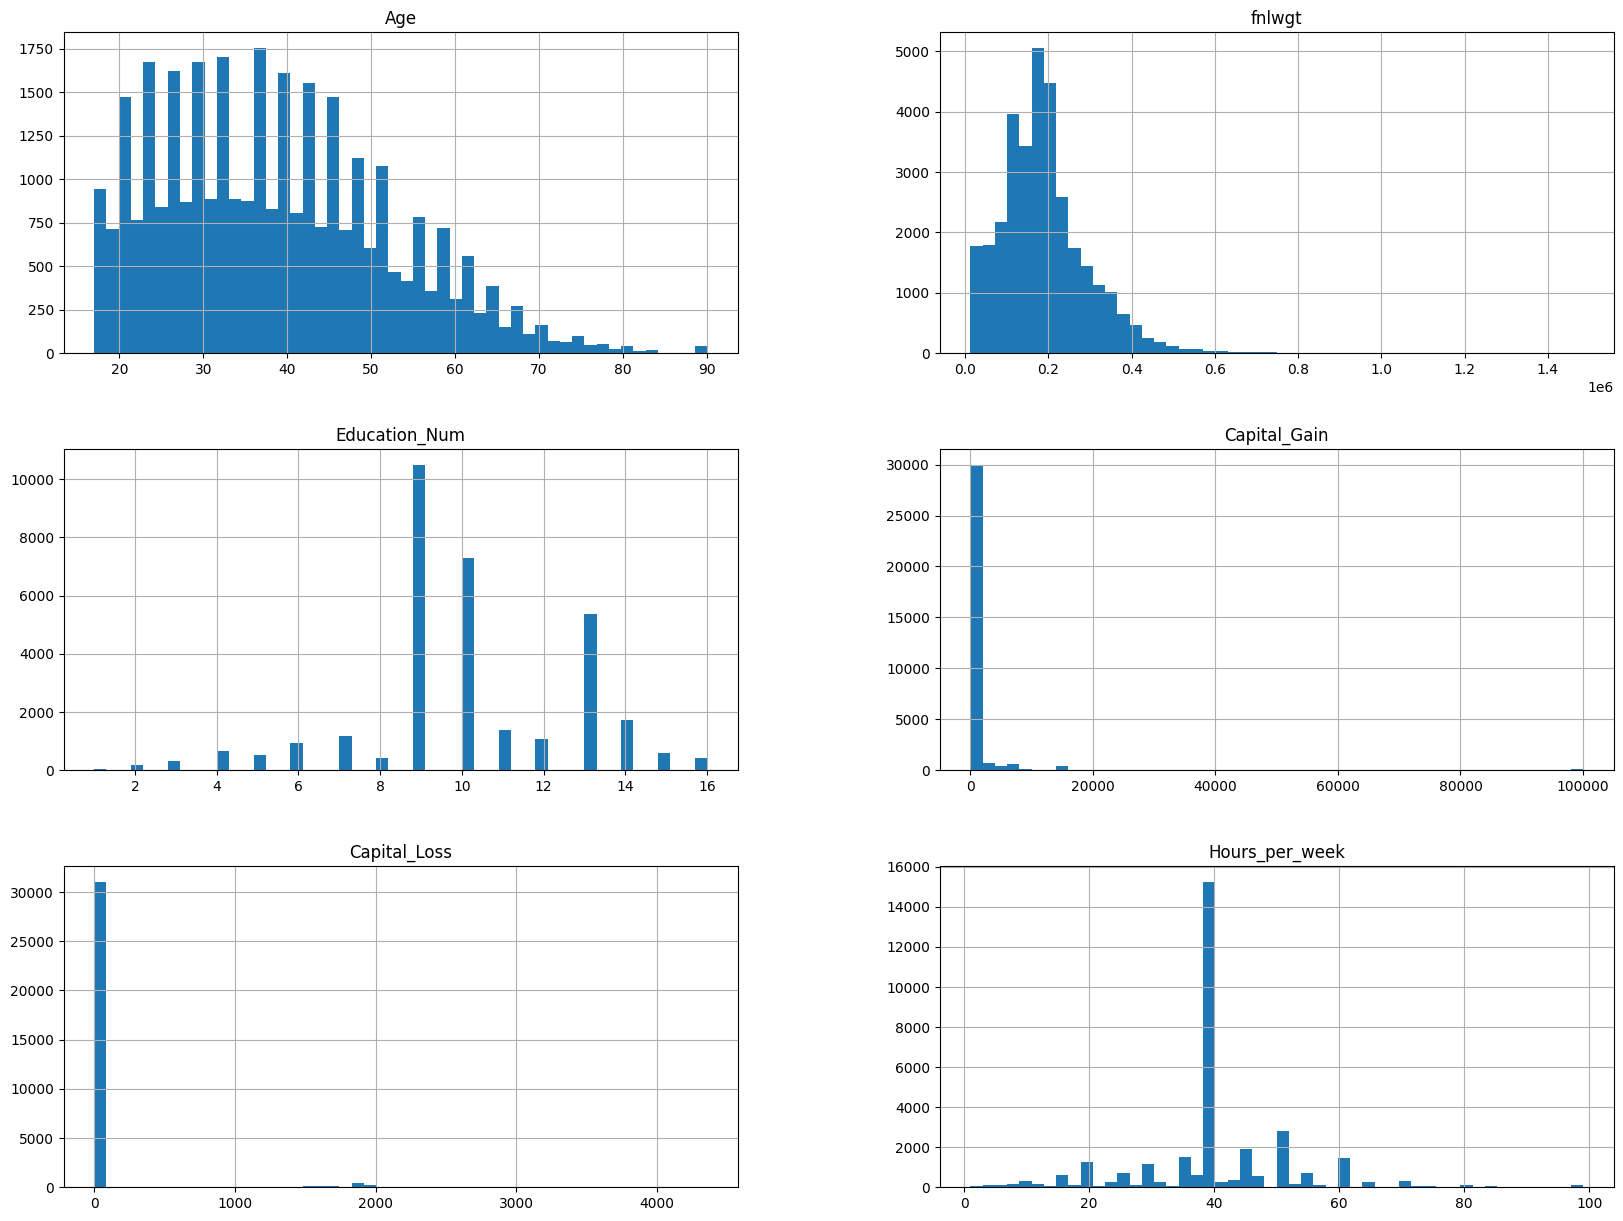

In [10]:
df1.hist(bins=50,figsize=(20,15))
plt.show();

In [11]:
empty_cols = [column for column in df1.columns if column not in ['Age', 'Hours_per_week']]
non_id_cols = [column for column in df1.columns if column != 'Age']

imputer = SimpleImputer(missing_values=0, strategy='median')
empty_transformer = ColumnTransformer(
    [('impute', imputer, empty_cols)],
    remainder='passthrough',    #Did not touch the other columns
    verbose_feature_names_out=False)    #Did not add a prefix to the column names  
empty_transformer.set_output(transform='pandas')  #Output to a table, not an array

scaler = StandardScaler()
scale_transformer = ColumnTransformer(
    [('scale', scaler, non_id_cols)],
    remainder='passthrough',    #Did not touch the other columns
    verbose_feature_names_out=False)    #Did not add a prefix to the column names 
scale_transformer.set_output(transform='pandas')  #Output to a table, not an array

preproc_pipeline = Pipeline([
    ('imputer', empty_transformer),
    ('scaler', scale_transformer)]
)
preproc_pipeline

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  SimpleImputer(missing_values=0,
                                                                strategy='median'),
                                                  ['fnlwgt', 'Education_Num',
                                                   'Capital_Gain',
                                                   'Capital_Loss'])],
                                   verbose_feature_names_out=False)),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['fnlwgt', 'Education_Num',
                                                   'Capital_Gain',
                                                   'Capital_Loss',
                                                   'Hours_per_week'])],
                                   verbose_feature_names_out=False))])

#Divide the input data into two samples - training and test:

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

data = df1[non_id_cols]
labels = df1['Education_Num']

shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=12345)

for idx_train, idx_test in shuffle.split(data, labels):
    pass

X_test = data.iloc[idx_test]
y_test = labels.iloc[idx_test]

X_train = data.iloc[idx_train]
y_train = labels.iloc[idx_train]

In [13]:
print(X_train)

       fnlwgt  Education_Num  Capital_Gain  Capital_Loss  Hours_per_week
2660   108993              9             0             0              45
9339   213408             10             0             0              40
6999   172230              9             0             0              40
8399   231962              9             0             0              40
3973   193219              9             0             0              35
...       ...            ...           ...           ...             ...
20602  227397             13             0             0              40
1422   202872             12             0             0              45
22160  385092             10             0             0              36
20205   92968             14         15024             0              40
8420   239390             13             0             0              18

[26048 rows x 5 columns]


In [14]:
print(y_train)

2660      9
9339     10
6999      9
8399      9
3973      9
         ..
20602    13
1422     12
22160    10
20205    14
8420     13
Name: Education_Num, Length: 26048, dtype: int64


Step 3: Develop a pipeline for training and cross-validation

In [15]:
df.dtypes

Age               int64
fnlwgt            int64
Education_Num     int64
Capital_Gain      int64
Capital_Loss      int64
Hours_per_week    int64
dtype: object

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
import pickle

classifiers = {
    'logistic_regression': (LogisticRegression(solver='saga', max_iter = 7500, random_state=20),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__penalty': ['l2', 'l1']}),
    'support_vectors': (SVC(kernel='poly'),
        {'clf__C': uniform(loc=0.1, scale=10), 'clf__degree': randint(2,5), 
        'clf__gamma': uniform(loc = 0, scale = 1), 'clf__coef0': uniform(loc=-1, scale=2)}),
    'knn': (KNeighborsClassifier(),
        {'clf__n_neighbors': randint(2,10), 'clf__p': randint(1,3)}),
    'bayes': (GaussianNB(),
        {'clf__var_smoothing': uniform(loc=1e-10, scale=1)}),
    'random_forest': (RandomForestClassifier(random_state=123),
        {'clf__n_estimators': randint(100,300), 'clf__max_features': ['sqrt', 'log2'], 
        'clf__min_samples_split': randint(2,5)}
    )
}

dataframe = pd.DataFrame(['accuracy', 'recall', 'precision', 'ROC AUC curve'])

for name, values in classifiers.items():
    clf, params = values
    pipeline = Pipeline([
        ("preproc", preproc_pipeline),
        ('clf', clf)]
    )
    model = RandomizedSearchCV(pipeline, params)

    model.fit(X_train, y_train)

    with open(f"saved_models/{name}.pkl", "wb") as file:
        pickle.dump(model, file, protocol=3)
    with open(f"hyperparams/{name}.txt", "w") as file:
        file.write(str(model.best_params_))
    print(name)
    print(model.best_params_, '\n' + '=' * 20)

    y_pred = model.predict(X_test)
    y_true = np.array(y_test)

    dataframe[name] = [accuracy_score(y_true, y_pred), recall_score(y_true, y_pred), 
    precision_score(y_true, y_pred), roc_auc_score(y_true, y_pred)]

    print(  f'Confusion matrix:\n {confusion_matrix(y_true, y_pred)}\n'
    )

dataframe